In [3]:
import pandas as pd
import matplotlib.pyplot as plt
corruption_df="corruption_perception_index.xlsx"
unicef_df="unicef_oct_2014.xlsx"
corruption_df=pd.read_excel("corruption_perception_index.xlsx")
unicef_df=pd.read_excel("unicef_oct_2014.xlsx")
corruption_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Country Rank,Country / Territory,NaN,NaN,NaN,Country Rank,CPI 2013 Score,Surveys Used,Standard Error,90% Confidence interval,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,WB Code,IFS Code,Region,NaN,NaN,NaN,NaN,Lower,...,IMD,ICRG,WB,WEF,WJP,EIU,GI,PERC,TI,FH
2,1,Denmark,DNK,128,EU,1,91,7,2.2,87,...,96,98,0,87,89,88,83,0,0,0
3,1,New Zealand,NZL,196,AP,1,91,7,2.3,87,...,89,98,0,96,86,88,83,0,0,0
4,3,Finland,FIN,172,EU,3,89,7,1.7,86,...,89,98,0,90,87,88,83,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,173,South Sudan,NaN,NaN,AF,173,14,3,1.6,11,...,0,0,12,0,0,0,0,0,0,0
175,174,Sudan,SDN,732,ME,174,11,6,3.5,5,...,0,2,0,0,0,21,11,0,0,0
176,175,Afghanistan,AFG,512,AP,175,8,3,3.3,3,...,0,0,12,0,0,0,1,0,0,0
177,175,Korea (North),PRK,NaN,AP,175,8,3,3.4,2,...,0,12,0,0,0,0,1,0,0,0


Empty DataFrame
Columns: [country, corruption_score, child_labour_percentage]
Index: []


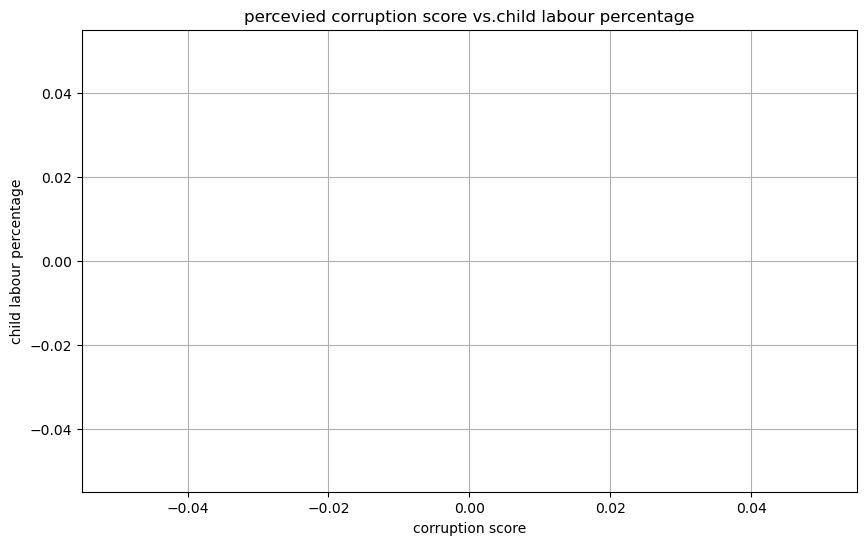

In [5]:
unicef_df
corruption_cleaned=corruption_df.iloc[2:,[1,7]]
corruption_cleaned.columns=['country','corruption_score']
corruption_cleaned=corruption_cleaned.dropna().reset_index(drop=True)
corruption_cleaned
unicef_cleaned=unicef_df.iloc[4:,[1,1]]
unicef_cleaned.columns=['country','child_labour_percentage']
unicef_cleaned=unicef_cleaned.dropna().reset_index(drop=True)
unicef_cleaned
merged_df=pd.merge(corruption_cleaned,unicef_cleaned,on='country')
merged_df
merged_df['corruption_score']=pd.to_numeric(merged_df['corruption_score'],errors='coerce')
merged_df['child_labour_percentage']=pd.to_numeric(merged_df['child_labour_percentage'],errors='coerce')
merged_df
merged_df=merged_df.dropna().reset_index(drop=True)
merged_df
print(merged_df)
plt.figure(figsize=(10,6))
plt.scatter(merged_df['corruption_score'],merged_df['child_labour_percentage'],color='blue',alpha=0.7)
plt.title('percevied corruption score vs.child labour percentage')
plt.xlabel('corruption score')
plt.ylabel('child labour percentage')
plt.grid(True)
plt.show()